In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import re
import pandas as pd

from wordcloud import WordCloud


In [2]:
df=pd.read_excel(r'C:\Users\henm7\OneDrive\Utalca\Tesis\Sofia Quitral\df_sent.xlsx')

In [3]:
df

,Calificacion,Descripcion1,Descripcion2,Lugar,Puntaje,score,Comentario
0,"5,0 de 5 burbujas",Imperdible,Hermoso lugar que hay que visitar en Talca. E...,Jardin Botanico,5,4,"La clasificación como ""positiva"" se debe a qu..."
1,"4,0 de 5 burbujas",Imperdible de Talca,"Visitamos nuevamente este parque, la última ve...",Jardin Botanico,4,4,El texto describe una experiencia positiva en...
2,"5,0 de 5 burbujas",Bonito paseo en familia,"Bonito paseo en familia, vale la pena visitar ...",Jardin Botanico,5,4,El texto describe una experiencia positiva y ...
3,"3,0 de 5 burbujas",UN PARQUE BOTANICO BONITO,"Es bonito,relajante, falta mayor inversión, cr...",Jardin Botanico,3,4,"Aunque el texto menciona algunas críticas (""f..."
4,"5,0 de 5 burbujas",Paseo,El jardín botánico de la universidad de talca ...,Jardin Botanico,5,5,El texto está lleno de palabras y expresiones...
...,...,...,...,...,...,...,...
997,"5,0 de 5 burbujas",El mejor trekking en Chile,Es realmente increíble y se merece las 4 horas...,Altos de lircay,5,5,El texto está lleno de palabras y expresiones...
998,"5,0 de 5 burbujas","remoto, pero accesible","Un corto viaje en autobús desde Talca, este es...",Altos de lircay,5,4,El texto describe un lugar con característica...
999,"5,0 de 5 burbujas",caminata increíble en medio de la nada,Disfrutamos de un gran día haciendo una camina...,Altos de lircay,5,4,"El texto tiene un tono generalmente positivo,..."
1000,"5,0 de 5 burbujas",Mejor trekking en Chile,"El mejor senderismo cerca de Santiago, es fáci...",Altos de lircay,5,3,El texto describe senderos y rutas de senderi...


In [4]:
df1=df[df['score']>2]

In [5]:
doc=df1['Descripcion2']

In [6]:
docs=doc.tolist()

In [7]:
#aplica stopwords a los temas
stop_words = stopwords.words('spanish')

#lee stopwords personalizadas desde archivo txt
with open(r"C:\Users\henm7\Downloads\spanish.txt", 'r') as f:
    for line in f:
        stop_words.append(line.strip())

#agrega palabras a la lista de stopwords
stop_words.extend(['lugar', 'camino'])

In [8]:
# Cargar las stopwords en español
#stop_words = set(stopwords.words('spanish'))

# Preprocesar los documentos: tokenizar, convertir a minúsculas y eliminar stopwords
texts = []
for doc in docs:
    words = word_tokenize(doc.lower())  # Convertir a minúsculas y tokenizar
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Eliminar stopwords y no palabras
    texts.append(words)

print("Documentos preprocesados:", texts)


Documentos preprocesados: [['hermoso', 'visitar', 'talca', 'gratis', 'entrada', 'animalitos', 'andan', 'sueltos'], ['visitamos', 'nuevamente', 'parque', 'vinimos', 'pandemia', 'remodelado', 'funciona', 'hrs', 'horario', 'continuado', 'lunes', 'domingo', 'entrada', 'piden', 'pase', 'movilidad', 'control', 'temperatura', 'aves', 'libres', 'patos', 'gansos', 'cisnes', 'faisanes', 'gallinetas', 'reconozco', 'lindos', 'senderos', 'encontramos', 'sedero', 'juegos', 'niños', 'especies', 'árboles', 'respectivos', 'nombres', 'talca', 'anda', 'paso', 'venir'], ['bonito', 'paseo', 'familia', 'vale', 'pena', 'visitar', 'niños', 'pequeños', 'ordenado', 'aves', 'acercan', 'gente', 'problema'], ['bonito', 'relajante', 'falta', 'inversión', 'quedar', 'diversidad', 'silvestre', 'coipos', 'patos', 'gallinas', 'pavos', 'reales', 'llamas', 'peces', 'colores', 'etc'], ['jardín', 'botánico', 'universidad', 'talca', 'opción', 'limpio', 'colores'], ['universidad', 'talca', 'flora', 'fauna', 'totalmente', 'gra

In [9]:
#lematizar
stemmer = SnowballStemmer('spanish')
texts = [[stemmer.stem(word) for word in words] for words in texts]


In [10]:
# Crear el diccionario
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_above=0.5)

# Convertir los documentos al formato de Bag of Words (BOW)
corpus = [dictionary.doc2bow(text) for text in texts]


In [11]:
# Definir un rango de números de tópicos para explorar
num_topics_range = range(2, 15)
coherence_values = []

for num_topics in num_topics_range:
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model_lda.get_coherence())

In [12]:
coherence_values

[0.3618714009125239,
 0.4166879756284924,
 0.4257284376161382,
 0.3538129201136962,
 0.36101219774475996,
 0.3615000577637894,
 0.37057972418950624,
 0.3826382739844321,
 0.3863537969876262,
 0.36360583781183387,
 0.3664250255049593,
 0.3628537760939683,
 0.3819586497996002]

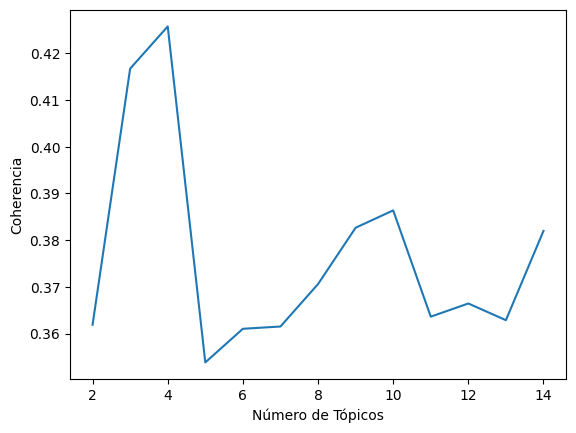

In [13]:
plt.plot(num_topics_range, coherence_values)
plt.xlabel("Número de Tópicos")
plt.ylabel("Coherencia")
plt.show()

In [14]:
# Definir el número de temas
num_topics = 4

# Entrenar el modelo LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=100,iterations=400)

# Mostrar los temas generados
for idx, topic in lda_model.print_topics(num_words=15):
    print(f"Tópico {idx + 1}: {topic}")


Tópico 1: 0.035*"naturalez" + 0.028*"hermos" + 0.022*"paisaj" + 0.020*"visit" + 0.017*"pas" + 0.016*"disfrut" + 0.015*"maravill" + 0.013*"agu" + 0.013*"recomend" + 0.012*"ideal" + 0.011*"famili" + 0.010*"lag" + 0.010*"lind" + 0.009*"excelent" + 0.009*"lugar"
Tópico 2: 0.027*"animal" + 0.025*"niñ" + 0.023*"famili" + 0.021*"visit" + 0.017*"piedr" + 0.014*"talc" + 0.014*"play" + 0.013*"lind" + 0.012*"univers" + 0.011*"iglesi" + 0.011*"aves" + 0.011*"especi" + 0.010*"jardin" + 0.010*"pase" + 0.009*"pas"
Tópico 3: 0.031*"parqu" + 0.023*"lleg" + 0.019*"taz" + 0.019*"camping" + 0.018*"sender" + 0.015*"agu" + 0.013*"salt" + 0.012*"bañ" + 0.010*"recorr" + 0.010*"hor" + 0.010*"dia" + 0.009*"rio" + 0.009*"leon" + 0.009*"entrad" + 0.008*"camin"
Tópico 4: 0.023*"lag" + 0.020*"pen" + 0.019*"lind" + 0.018*"val" + 0.016*"agu" + 0.016*"play" + 0.015*"roc" + 0.014*"com" + 0.014*"hermos" + 0.014*"deport" + 0.013*"tranquil" + 0.013*"natural" + 0.012*"vist" + 0.011*"pas" + 0.009*"zon"


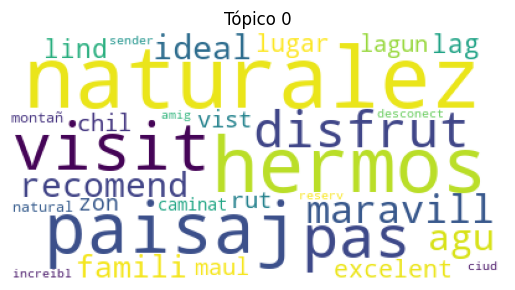

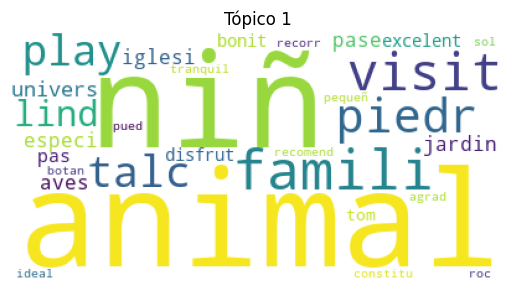

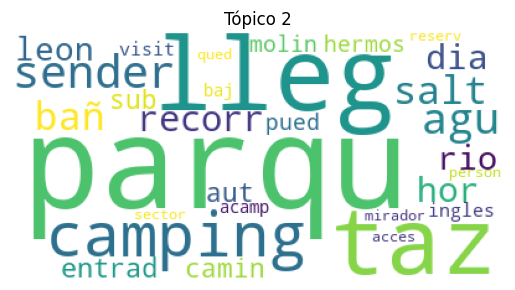

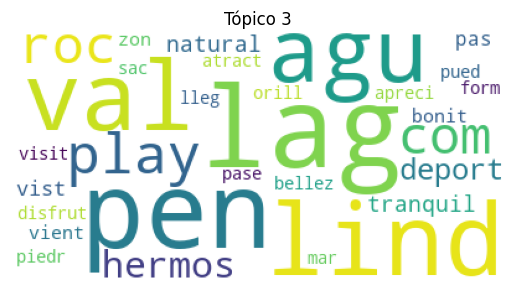

In [19]:

for i in range(0, num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
               .fit_words(dict(lda_model.show_topic(i, 30))))
    plt.axis("off")
    plt.title("Tópico " + str(i))
    #guarda las imagenes
    plt.savefig(f"wordcloud_topic_posit{i}.pdf", format='pdf')
    plt.show()

In [20]:
df1=df[df['score']<3]
doc=df1['Descripcion2']
docs=doc.tolist()

# Cargar las stopwords en español
#stop_words = set(stopwords.words('spanish'))

# Preprocesar los documentos: tokenizar, convertir a minúsculas y eliminar stopwords
texts = []
for doc in docs:
    words = word_tokenize(doc.lower())  # Convertir a minúsculas y tokenizar
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Eliminar stopwords y no palabras
    texts.append(words)
    
#lematizar
stemmer = SnowballStemmer('spanish')
texts = [[stemmer.stem(word) for word in words] for words in texts]


# Crear el diccionario
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_above=0.5)

# Convertir los documentos al formato de Bag of Words (BOW)
corpus = [dictionary.doc2bow(text) for text in texts]


    

In [21]:
# Definir un rango de números de tópicos para explorar
num_topics_range = range(2, 15)
coherence_values = []

for num_topics in num_topics_range:
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model_lda.get_coherence())

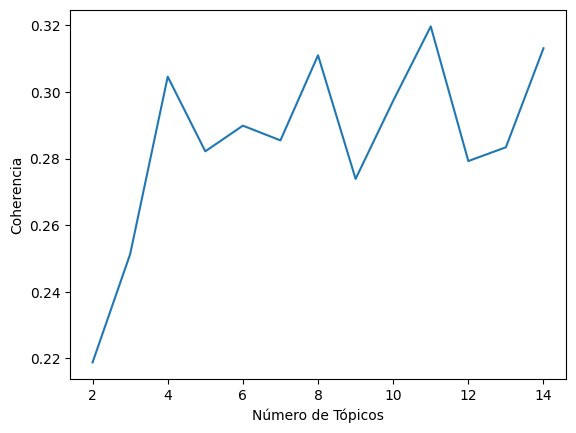

In [22]:
plt.plot(num_topics_range, coherence_values)
plt.xlabel("Número de Tópicos")
plt.ylabel("Coherencia")
plt.show()

In [23]:
# Definir el número de temas
num_topics = 6

# Entrenar el modelo LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=100,iterations=400)

# Mostrar los temas generados
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Tópico {idx + 1}: {topic}")


Tópico 1: 0.071*"camping" + 0.062*"lleg" + 0.048*"visit" + 0.044*"cas" + 0.040*"reserv" + 0.039*"inform" + 0.039*"esper" + 0.032*"deb" + 0.032*"conaf" + 0.031*"descuid"
Tópico 2: 0.117*"hermos" + 0.072*"lleg" + 0.066*"visit" + 0.055*"lugar" + 0.045*"parqu" + 0.044*"basur" + 0.038*"entrad" + 0.033*"pequeñ" + 0.033*"reserv" + 0.023*"pen"
Tópico 3: 0.142*"lag" + 0.098*"agu" + 0.066*"gent" + 0.057*"lament" + 0.048*"sec" + 0.041*"play" + 0.032*"aut" + 0.030*"natural" + 0.029*"vist" + 0.028*"lleg"
Tópico 4: 0.065*"parqu" + 0.061*"mal" + 0.050*"aut" + 0.048*"qued" + 0.044*"mas" + 0.041*"talc" + 0.038*"pas" + 0.038*"agu" + 0.036*"taz" + 0.034*"visit"
Tópico 5: 0.071*"lleg" + 0.062*"lugar" + 0.051*"lind" + 0.049*"unic" + 0.048*"señal" + 0.048*"camping" + 0.041*"vist" + 0.040*"entrad" + 0.039*"acamp" + 0.037*"precios"
Tópico 6: 0.052*"taz" + 0.047*"lleg" + 0.042*"parqu" + 0.042*"mal" + 0.041*"sender" + 0.036*"fot" + 0.030*"gent" + 0.029*"leon" + 0.028*"acced" + 0.027*"bonit"


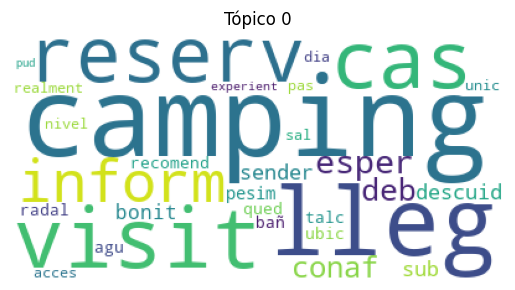

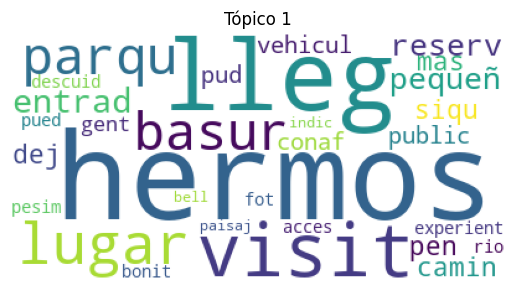

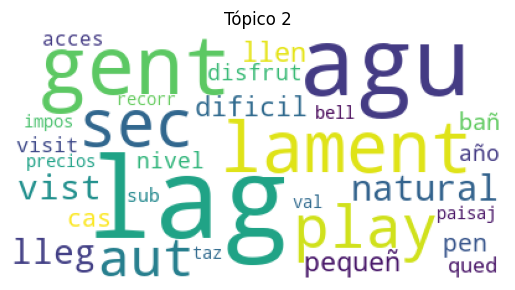

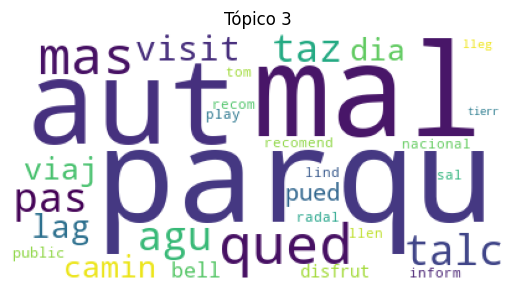

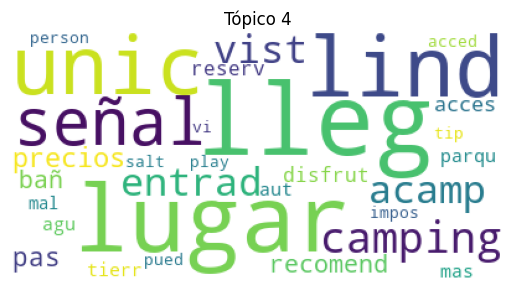

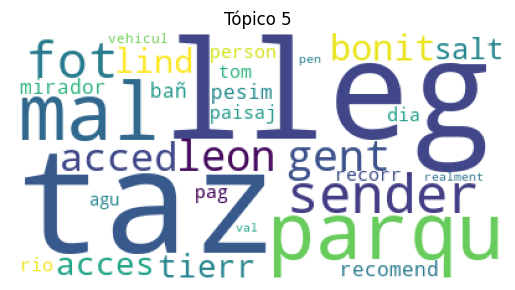

In [24]:

for i in range(0, num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
               .fit_words(dict(lda_model.show_topic(i, 30))))
    plt.axis("off")
    plt.title("Tópico " + str(i))
    plt.savefig('topic_1_2'+str(i)+'.png')
    plt.show()

In [16]:
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

In [85]:
pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.show(lda_vis,local=False)

Serving to http://127.0.0.1:8888/    [Ctrl-C to exit]


127.0.0.1 - - [21/Oct/2024 13:55:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Oct/2024 13:55:56] code 404, message Not Found
127.0.0.1 - - [21/Oct/2024 13:55:56] "GET /favicon.ico HTTP/1.1" 404 -
